In [1]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

In [2]:
plt.isinteractive()

True

In [3]:
tips = sb.load_dataset("tips")

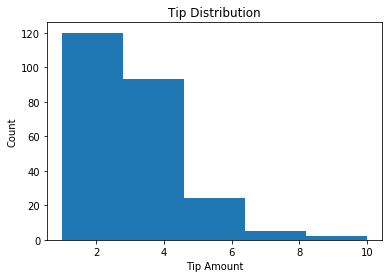

In [4]:
# Histogram 
plt.title("Tip Distribution")
plt.xlabel("Tip Amount")
plt.ylabel("Count")
d = plt.hist(tips['tip'], bins=5)

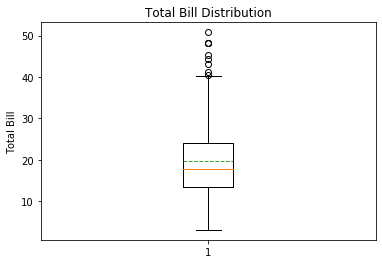

In [5]:
plt.title("Total Bill Distribution")
plt.ylabel("Total Bill")
c = plt.boxplot(tips['total_bill'], showmeans=True, meanline=True)
# c = plt.boxplot(tips['total_bill'], showmeans=True, meanline=True, showfliers=False)

In [6]:
day_total = tips.groupby("day", as_index=False)['total_bill'].sum()

In [7]:
day_total

,day,total_bill
0,Thur,1096.33
1,Fri,325.88
2,Sat,1778.40
3,Sun,1627.16


<BarContainer object of 4 artists>


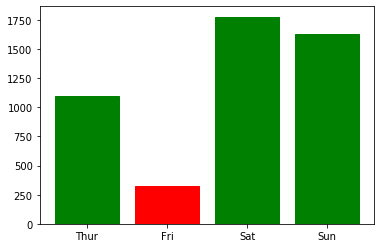

In [25]:
# b = plt.bar(x='day',height='total_bill', data=day_total)
b = plt.bar(x=day_total.day,height=day_total.total_bill)
print(b)
for a in b:
    # print(str(a))
    if a.get_height() > 1000:
        a.set_color('green')
    else:
        a.set_color('red')

In [9]:
tip_per = tips.groupby("day", as_index=False)['total_bill','tip'].sum()


In [11]:
tip_per['per'] = tip_per.tip / tip_per.total_bill * 100

In [13]:
tip_per

,day,total_bill,tip,per
0,Thur,1096.33,171.83,15.673201
1,Fri,325.88,51.96,15.944519
2,Sat,1778.40,260.40,14.642375
3,Sun,1627.16,247.39,15.203791


<BarContainer object of 4 artists>

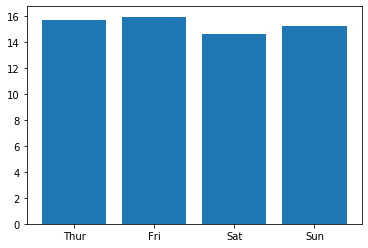

In [14]:
plt.bar(tip_per.day, tip_per.per)

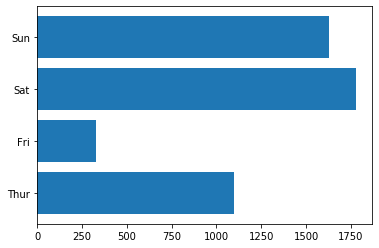

In [8]:
g = plt.barh(y=day_total['day'],width=day_total['total_bill'])

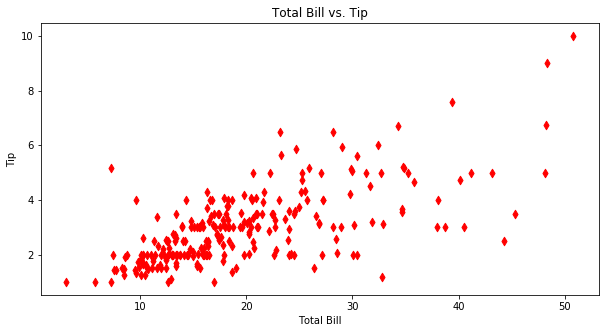

In [19]:
plt.title("Total Bill vs. Tip")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.scatter('total_bill','tip', marker='d', data=tips, c ='red')
plt.gcf().set_size_inches(10,5)
# plt.xlim(0,70)  # X Scale
# plt.ylim(0,12)  # Y Scale
# plt.savefig("tips_total.jpg")

In [21]:
img = plt.imread('tips_total.jpg')

In [22]:
type(img)

numpy.ndarray

In [23]:
img.shape

(360, 720, 3)

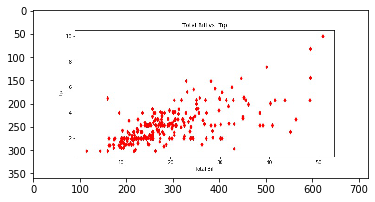

In [24]:
plt.imshow(img)

## Object API

In [29]:
total_tip = tips.groupby("day", as_index=False)['tip'].sum()
total_bill = tips.groupby("day", as_index=False)["total_bill"].sum()
print(total_tip)
print(type(total_tip))

    day     tip
0  Thur  171.83
1   Fri   51.96
2   Sat  260.40
3   Sun  247.39
<class 'pandas.core.frame.DataFrame'>


Text(0, 0.5, 'Amount')

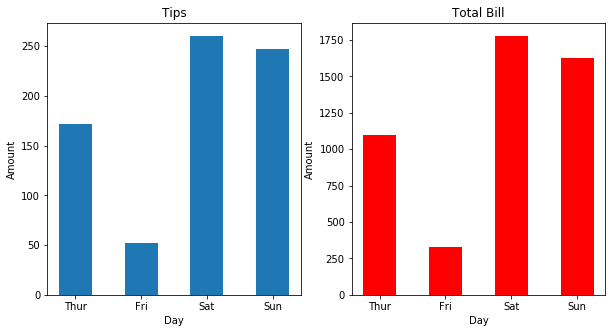

In [30]:
fig,ax = plt.subplots(1,2)   # 1 row x 2 cols
fig.set_size_inches(10,5)
ax[0].bar(x = total_tip.day, height = total_tip.tip, width=0.5)
ax[0].set_title("Tips")
ax[0].set_xlabel("Day")
ax[0].set_ylabel("Amount")

ax[1].bar(x = total_bill.day, height = total_bill.total_bill, color='r', width=0.5)
ax[1].set_title("Total Bill")
ax[1].set_xlabel("Day")
ax[1].set_ylabel("Amount")

Text(0, 0.5, 'Amount')

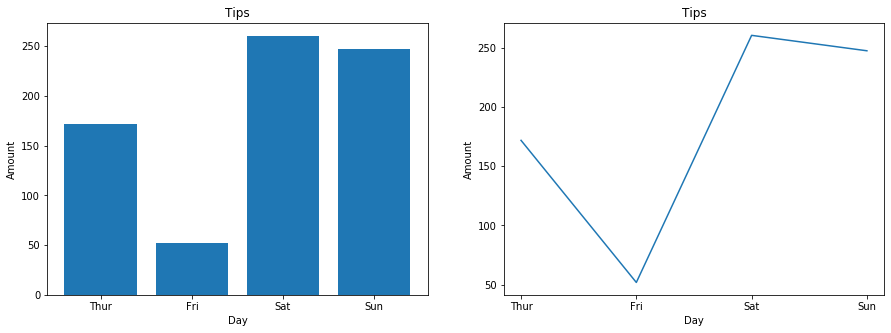

In [33]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(15,5)
ax[0].bar(x = total_tip.day, height = total_tip.tip)
ax[0].set_title("Tips")
ax[0].set_xlabel("Day")
ax[0].set_ylabel("Amount")

ax[1].plot(list(total_tip.day), list(total_tip.tip))
ax[1].set_title("Tips")
ax[1].set_xlabel("Day")
ax[1].set_ylabel("Amount")

In [35]:
total = pd.pivot_table(data = tips, index="day",columns='sex',values='total_bill',aggfunc='sum')
total

sex,Male,Female
day,,
Thur,561.44,534.89
Fri,198.57,127.31
Sat,1227.35,551.05
Sun,1269.46,357.70


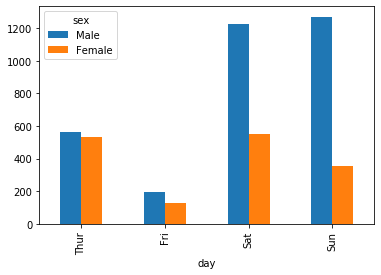

In [36]:
total.plot.bar()

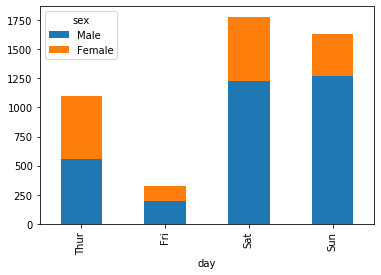

In [37]:
total.plot.bar(stacked=True)

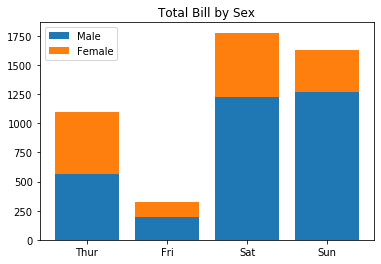

In [40]:
# Stacked bar
plt.title("Total Bill by Sex")
b1 = plt.bar(x=total.index, height=total['Male'])
b2 = plt.bar(x=total.index, height=total['Female'], bottom = total['Male'])
plt.legend((b1[0], b2[0]), ('Male', 'Female'))

In [41]:
day_total = tips.groupby("day")['total_bill'].sum()

In [42]:
day_total

day
Thur    1096.33
Fri      325.88
Sat     1778.40
Sun     1627.16
Name: total_bill, dtype: float64

([<matplotlib.patches.Wedge object at 0x0000022D54579BC8>, <matplotlib.patches.Wedge object at 0x0000022D545801C8>, <matplotlib.patches.Wedge object at 0x0000022D54584D48>, <matplotlib.patches.Wedge object at 0x0000022D5458CC48>], [Text(0.8317418198604141, 0.7198649492059511, 'Thur'), Text(-0.07485481766878774, 1.0974501156188252, 'Fri'), Text(-1.189343604273835, 0.1595675122727787, 'Sat'), Text(0.5388644448471241, -0.9589708598698924, 'Sun')], [Text(0.4536773562874985, 0.3926536086577915, '22.71'), Text(-0.04082990054661149, 0.5986091539739046, ' 6.75'), Text(-0.693783769159737, 0.09308104882578756, '36.84'), Text(0.29392606082570405, -0.5230750144744867, '33.70')])


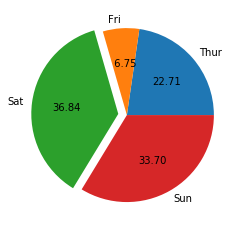

In [55]:
xplode  = (0,0,0.1,0)
ax = plt.pie(day_total.values, labels = day_total.index, autopct="%5.2f",
             explode=xplode)
print(ax)

### Custom line graph

Text(0, 0.5, 'Amt. In Thousands')

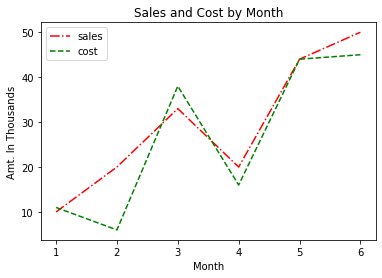

In [51]:
sales = [10,20,33,20,44,50]
cost = [11,6,38,16,44,45]
months = [1,2,3,4,5,6]
plt.plot(months,sales, 'r-.',months,cost,'g--')
plt.legend(['sales','cost'])
plt.title("Sales and Cost by Month")
plt.xlabel("Month")
plt.ylabel("Amt. In Thousands")

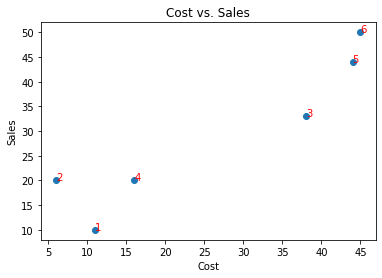

In [53]:
sales = [10,20,33,20,44,50]
cost = [11,6,38,16,44,45]
months = [1,2,3,4,5,6]
plt.scatter(cost,sales)
plt.xlabel("Cost")
plt.ylabel("Sales")
plt.title("Cost vs. Sales")

for m,c,s in zip(months,cost,sales):
   plt.annotate(m, xy=(c,s), color='r')